In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [3]:
#Генерируем датасет
X, y = datasets.make_classification(n_samples=100, n_features=236
                                       , n_informative=23,
                                       n_redundant=0, n_classes=2, random_state=1)
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

X_train_tr = X_train.T
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.T
y_test_tr = y_test.reshape(1, y_test.shape[0])

Размер массива признаков обучающей выборки (70, 236)
Размер массива признаков тестовой выборки (30, 236)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


### 1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [4]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred, where=(y_pred!=0)) + (1.0 - y) * np.log(1.0 - y_pred, where=((1-y_pred)!=0)))
    return err

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [5]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, err)
    return W

In [6]:
W = eval_model(X_train_tr, y_train, iterations=50000, alpha=1e-2)

50000 0.00028638646276939606


### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [7]:
def calc_pred_proba(W, X):
    n = X.shape[1]
    y_pred_proba = sigmoid(np.dot(W.T, X))
    return y_pred_proba

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [8]:
def calc_pred(W, X, threshold):
        A = calc_pred_proba(W, X)
        A = A >= threshold
        y_pred = np.zeros(A.shape[0])
        for i in range(len(y_pred)):
            if A[i] == True: 
                y_pred[i] = 1
            else:
                continue
        return y_pred

### 5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [9]:
# Accuracy
y_predicted_train = calc_pred(W, X_train_tr, threshold=0.5) 
y_predicted_test = calc_pred(W, X_test_tr, threshold=0.5)
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Точность на обучающей выборке: 100.000
Точность на тестовой выборке: 60.000


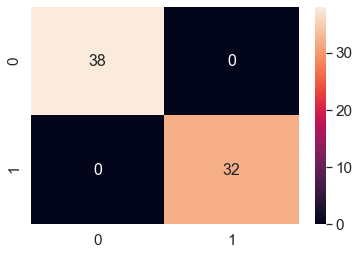

In [10]:
#Матрица ошибок для обучающей выборки
cm_train = confusion_matrix(y_train, y_predicted_train)

df_cm_train = pd.DataFrame(cm_train, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm_train, annot=True, annot_kws={"size": 16})

plt.show()

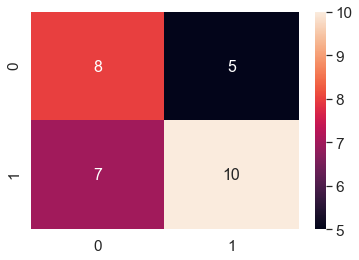

In [11]:
#Матрица ошибок для тестовой выборки
cm_test = confusion_matrix(y_test, y_predicted_test)

df_cm_test = pd.DataFrame(cm_test, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm_test, annot=True, annot_kws={"size": 16})

plt.show()

In [12]:
#Подсчет Precision и Recall
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_predicted_train).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_predicted_test).ravel()

precision_train = tp_train/(tp_train+fp_train)
precision_test = tp_test/(tp_test+fp_test)
recall_train = tp_train/(tp_train+fn_train)
recall_test = tp_test/(tp_test+fn_test)

print(f'Precision для обучающей выборки = {precision_train}')
print(f'Precision для тестовой выборки = {precision_test:.2f}')
print(f'Recall для обучающей выборки = {recall_train}')
print(f'Recall для тестовой выборки = {recall_test:.2f}')

Precision для обучающей выборки = 1.0
Precision для тестовой выборки = 0.67
Recall для обучающей выборки = 1.0
Recall для тестовой выборки = 0.59


In [13]:
#F-мера
f_train = 2*precision_train*recall_train/(precision_train+recall_train)
f_test = 2*precision_test*recall_test/(precision_test+recall_test)

print(f'F-score для обучающей выборки: {f_train}')
print(f'F-score для тестовой выборки: {f_test}')

F-score для обучающей выборки: 1.0
F-score для тестовой выборки: 0.625


### 6. Могла ли модель переобучиться? Почему?

Модель явно переобучилась из-за не оптимальных гиперпараметров при подсчете весов, нужно подбирать скорость обучения и кол-во итераций.

### 7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [14]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_*np.sign(W))
    if i % (iterations / 10) == 0:
        print(i, err)
    return W

def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_ * W)
    if i % (iterations / 10) == 0:
        print(i, err)
    return W